In [71]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

from scipy.optimize import newton

In [3]:
def effective_tax_rate(income, brackets, deduction=0):
    brackets += [(float('Inf'), float('NaN'))]
    
    taxable_income = max(income-deduction,0)
    
    tax = 0
    for bracket, next_bracket in zip(brackets, brackets[1:]):
        if taxable_income <= next_bracket[0]:
            tax += (taxable_income - bracket[0])*bracket[1]
            break
        else:
            tax += (next_bracket[0] - bracket[0])*bracket[1]
    return tax/income

In [17]:
def effective_tax_rate_diff(income, brackets_1, deductions_1, brackets_2, deductions_2):
    return effective_tax_rate(income, brackets_2, deductions_2)-effective_tax_rate(income, brackets_1, deductions_1)

In [95]:
def min_itemized_deductions_screwed_point(income, brackets_1, brackets_2, standard_deduction_2):
    fun = lambda x: effective_tax_rate_diff(income, brackets_1, x, brackets_2, standard_deduction_2)
    return brentq(fun, 0, 200000)

# Single

In [90]:
brackets_2017 = [(0, .1),
                 (9325, .15),
                 (37950, .25),
                 (91900, .28),
                 (191650, .33),
                 (416700, .35),
                 (418400, .396)]
standard_deduction_2017 = 6350

brackets_2018 = [(0, .1),
                 (9526, .12),
                 (38701, .22),
                 (82501, .24),
                 (157501, .32),
                 (200001, .35),
                 (500000, .37)]
standard_deduction_2018 = 12200

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in double_scalars
  del sys.path[0]
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in true_divide
  del sys.path[0]


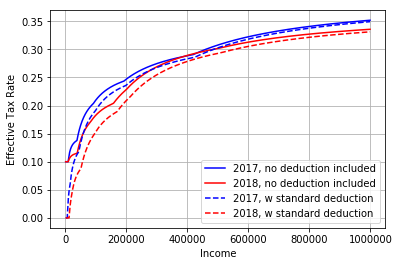

In [88]:
x = np.arange(0, 1000000, 1000)
plt.plot(x, [effective_tax_rate(xi, brackets_2017) for xi in x], 'b-', label="2017, no deduction included")
plt.plot(x, [effective_tax_rate(xi, brackets_2018) for xi in x], 'r-', label="2018, no deduction included")
plt.plot(x, [effective_tax_rate(xi, brackets_2017, standard_deduction_2017) for xi in x], 'b--', label="2017, w standard deduction")
plt.plot(x, [effective_tax_rate(xi, brackets_2018, standard_deduction_2018) for xi in x], 'r--', label="2018, w standard deduction")
plt.legend()
plt.xlabel('Income')
plt.ylabel('Effective Tax Rate')
plt.grid(True)

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in double_scalars
  del sys.path[0]
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in true_divide
  del sys.path[0]


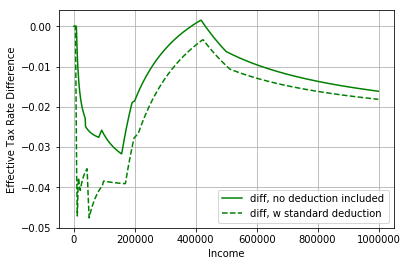

In [89]:
x = np.arange(0, 1000000, 1000)
plt.plot(x, [effective_tax_rate_diff(xi, brackets_2017, 0, brackets_2018, 0) for xi in x], 
         'g-', label="diff, no deduction included")
plt.plot(x, [effective_tax_rate_diff(xi, brackets_2017, standard_deduction_2017, brackets_2018, standard_deduction_2018) for xi in x], 
         'g--', label="diff, w standard deduction")
plt.legend()
plt.xlabel('Income')
plt.ylabel('Effective Tax Rate Difference')
plt.grid(True)

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in true_divide
  del sys.path[0]
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in double_scalars
  del sys.path[0]
/usr/local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


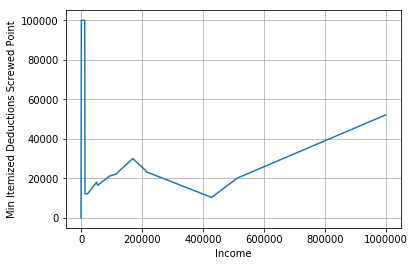

In [85]:
x = np.arange(0, 1000000, 1000)
plt.plot(x, [min_itemized_deductions_screwed_point(xi, brackets_2017, brackets_2018, standard_deduction_2018) for xi in x])
plt.legend()
plt.xlabel('Income')
plt.ylabel('Min Itemized Deductions Screwed Point')
plt.grid(True)

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in true_divide
  del sys.path[0]
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in double_scalars
  del sys.path[0]
/usr/local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


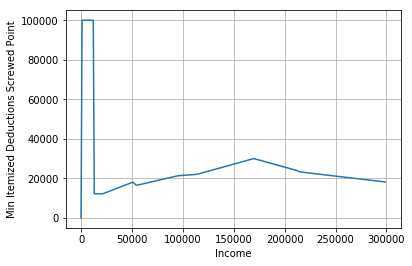

In [87]:
x = np.arange(0, 300000, 1000)
plt.plot(x, [min_itemized_deductions_screwed_point(xi, brackets_2017, brackets_2018, standard_deduction_2018) for xi in x])
plt.legend()
plt.xlabel('Income')
plt.ylabel('Min Itemized Deductions Screwed Point')
plt.grid(True)

# Married

In [91]:
brackets_2017 = [(0, .1),
                 (18650, .15),
                 (75900, .25),
                 (153100, .28),
                 (233350, .33),
                 (416700, .35),
                 (470700, .396)]
standard_deduction_2017 = 12700

brackets_2018 = [(0, .1),
                 (19050, .12),
                 (77400, .22),
                 (165000, .24),
                 (315000, .32),
                 (400000, .35),
                 (600000, .37)]
standard_deduction_2018 = 24400

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in double_scalars
  del sys.path[0]
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in true_divide
  del sys.path[0]


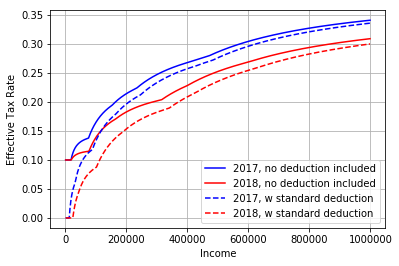

In [92]:
x = np.arange(0, 1000000, 1000)
plt.plot(x, [effective_tax_rate(xi, brackets_2017) for xi in x], 'b-', label="2017, no deduction included")
plt.plot(x, [effective_tax_rate(xi, brackets_2018) for xi in x], 'r-', label="2018, no deduction included")
plt.plot(x, [effective_tax_rate(xi, brackets_2017, standard_deduction_2017) for xi in x], 'b--', label="2017, w standard deduction")
plt.plot(x, [effective_tax_rate(xi, brackets_2018, standard_deduction_2018) for xi in x], 'r--', label="2018, w standard deduction")
plt.legend()
plt.xlabel('Income')
plt.ylabel('Effective Tax Rate')
plt.grid(True)

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in double_scalars
  del sys.path[0]
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in true_divide
  del sys.path[0]


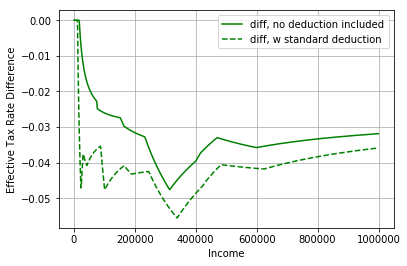

In [93]:
x = np.arange(0, 1000000, 1000)
plt.plot(x, [effective_tax_rate_diff(xi, brackets_2017, 0, brackets_2018, 0) for xi in x], 
         'g-', label="diff, no deduction included")
plt.plot(x, [effective_tax_rate_diff(xi, brackets_2017, standard_deduction_2017, brackets_2018, standard_deduction_2018) for xi in x], 
         'g--', label="diff, w standard deduction")
plt.legend()
plt.xlabel('Income')
plt.ylabel('Effective Tax Rate Difference')
plt.grid(True)

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in true_divide
  del sys.path[0]
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in double_scalars
  del sys.path[0]
/usr/local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


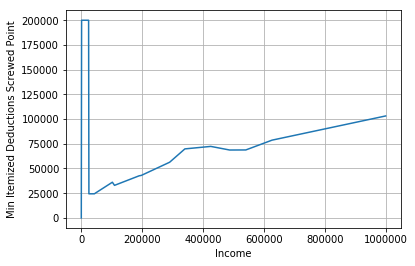

In [96]:
x = np.arange(0, 1000000, 1000)
plt.plot(x, [min_itemized_deductions_screwed_point(xi, brackets_2017, brackets_2018, standard_deduction_2018) for xi in x])
plt.legend()
plt.xlabel('Income')
plt.ylabel('Min Itemized Deductions Screwed Point')
plt.grid(True)

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in true_divide
  del sys.path[0]
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in double_scalars
  del sys.path[0]
/usr/local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


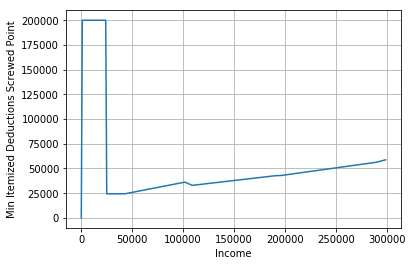

In [97]:
x = np.arange(0, 300000, 1000)
plt.plot(x, [min_itemized_deductions_screwed_point(xi, brackets_2017, brackets_2018, standard_deduction_2018) for xi in x])
plt.legend()
plt.xlabel('Income')
plt.ylabel('Min Itemized Deductions Screwed Point')
plt.grid(True)